# UK General Election 2017

Here I am looking at the results of the UK General Election of 2017. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import scipy.stats as stats

%matplotlib inline  


#  Exploring The Data

The dataset contains a breakdown of the votes won by each party in each constituency, location info and the result.

In [2]:
GE17 = pd.read_csv("GE2017.csv", header=0)
GE17.head()

,ons_id,ons_region_id,constituency_name,county_name,region_name,country_name,constituency_type,declaration_time,result,first_party,...,green,snp,pc,dup,sf,sdlp,uup,alliance,other,other_winner
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,2017-06-09 02:41:00,Lab hold,Lab,...,0,0,2761,0,0,0,0,0,0,0
1,W07000058,W92000004,Aberconwy,Clwyd,Wales,Wales,County,2017-06-09 02:31:00,Con hold,Con,...,0,0,3170,0,0,0,0,0,0,0
2,S14000001,S92000003,Aberdeen North,Scotland,Scotland,Scotland,Borough,2017-06-09 02:26:00,SNP hold,SNP,...,0,15170,0,0,0,0,0,0,522,0
3,S14000002,S92000003,Aberdeen South,Scotland,Scotland,Scotland,Borough,2017-06-09 03:08:00,Con gain from SNP,Con,...,0,13994,0,0,0,0,0,0,0,0
4,S14000003,S92000003,Airdrie and Shotts,Scotland,Scotland,Scotland,County,2017-06-09 03:10:00,SNP hold,SNP,...,0,14291,0,0,0,0,0,0,0,0


In [3]:
GE17.columns

Index(['ons_id', 'ons_region_id', 'constituency_name', 'county_name',
       'region_name', 'country_name', 'constituency_type', 'declaration_time',
       'result', 'first_party', 'second_party', 'electorate', 'valid_votes',
       'invalid_votes', 'majority', 'con', 'lab', 'ld', 'ukip', 'green', 'snp',
       'pc', 'dup', 'sf', 'sdlp', 'uup', 'alliance', 'other', 'other_winner'],
      dtype='object')

# GE2017 Results

326 seats are needed for a majority in the House of Commons,  no party obtained the magic 326 needed to govern alone (the grey line in the bar plot below).

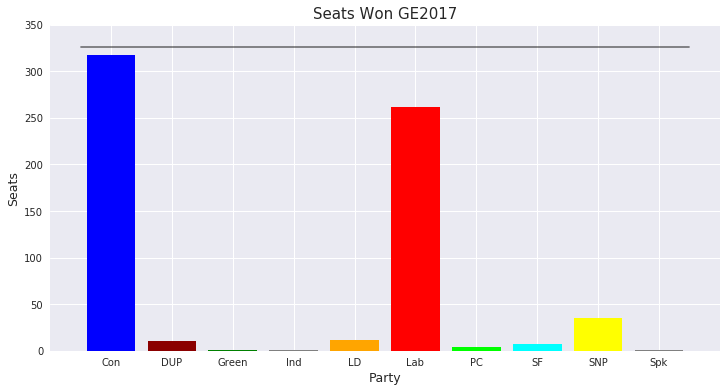

In [4]:
totals = GE17.groupby("first_party").count()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(totals.index, height=totals["result"], color=["b", "darkred", "green", "grey", "orange", "r", "lime", 
                                                      "cyan", "yellow", "grey"]);
ax.set_title("Seats Won GE2017", size =15)
ax.set_xlabel("Party", size =12.5)
ax.set_ylabel("Seats", size =12.5)
ax.set_ylim(top=350)

maj = 326
ax.plot([-0.5,9.5], [326,326], color="black", alpha=0.5)


#  Votes By Region

Here is a visualization of the votes won by the major parties in each region of the UK. There are clear areas of dominance for parties in some areas of the country. 

In [5]:
GE17["other_party"] = GE17["other"]+GE17["other_winner"]
GE17.drop(["other", "other_winner"], axis=1)


region_totals = GE17.pivot_table(values=["con", "alliance", "dup", "green", "lab", "ld", "pc","sdlp", "sf", "snp", 
                                           "ukip", "uup", "other_party"], index="region_name", aggfunc="sum", margins=True)
region_totals

,alliance,con,dup,green,lab,ld,other_party,pc,sdlp,sf,snp,ukip,uup
region_name,,,,,,,,,,,,,
East,0,1690813,0,58704,1012357,244054,10588,0,0,0,0,77793,0
East Midlands,0,1195982,0,34355,954635,101612,14516,0,0,0,0,56358,0
London,0,1268800,0,67561,2086595,336725,19448,0,0,0,0,49369,0
North East,0,440613,0,16080,709738,58409,5878,0,0,0,0,49348,0
North West,0,1301562,0,39608,1972632,193053,19705,0,0,0,0,68946,0
Northern Ireland,64553,3895,292316,7452,0,0,42501,0,95419,238915,0,0,83280
Scotland,0,757949,0,5886,717007,179062,6921,0,0,0,977568,5302,0
South East,0,2495350,0,143873,1326320,487203,112871,0,0,0,0,104509,0
South West,0,1542296,0,68010,875213,448730,35250,0,0,0,0,33160,0


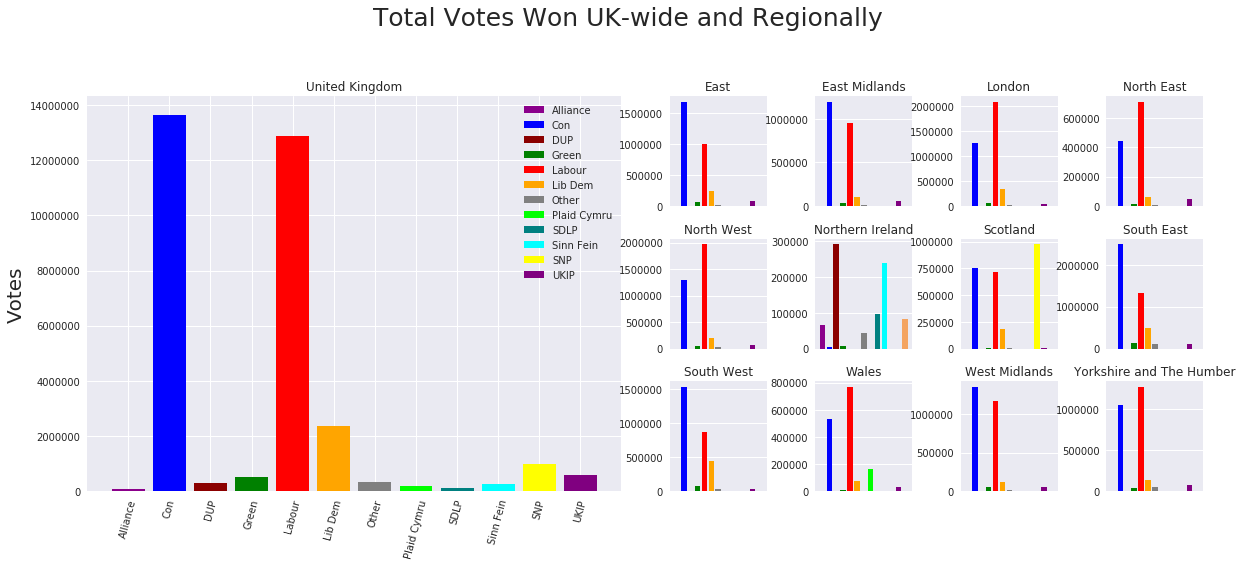

In [6]:
grid = plt.GridSpec(5, 8, wspace=0.5, hspace=0.3)
fig = plt.figure(figsize=(20, 12.5))
all = fig.add_subplot(grid[:3, :4])

colours = ["darkmagenta", "b", "darkred", "green", "r", "orange", "grey", "lime", "teal", "cyan", "yellow", "purple", 
           "sandybrown"]

labels = ["Alliance", "Con", "DUP", "Green", "Labour", "Lib Dem", "Other", "Plaid Cymru", "SDLP", "Sinn Fein", "SNP", "UKIP", 
           "UUP"]

plt.suptitle("Total Votes Won UK-wide and Regionally", size =25)

x = len(region_totals.index)

for i in range (0, x-1):
    plt.bar(i, height=region_totals.iloc[12, i], color=colours[i])

#all.bar(labels, height=region_totals.loc["All"], color=colours, label=labels)
plt.xticks(np.arange(12), labels)
all.tick_params(axis='x', rotation=75)
all.set_ylabel("Votes", size =20)
all.ticklabel_format(style='plain', axis='y')
all.set_title("United Kingdom")

all.legend(labels)

for i in range (0, x-1):
    #print((i)//4, (i%4)+4)
    #print((i-1)//4)#, 4+i%4)
    graph = fig.add_subplot(grid[i//4, (i%4)+4])
    graph.bar(region_totals.columns, height=region_totals.iloc[i], color=colours)
    graph.set_title(str(region_totals.index[i]))
    graph.set_xticks([])
    


#  Turnout

Turnout was touted to be a key factor for the Labour party, and this may be the case where Labour made gains in unorthodox areas (in blue, below). However in the traditional strong Labour areas turnout was below the UK average e.g. the North-East (in red). Historical data is needed for a full picture. 

In [7]:
#turnout % by region

region_totals_valid = GE17.pivot_table(values=["valid_votes", "electorate"], index="region_name", aggfunc="sum", margins=True)

region_totals_valid["turnout"] = region_totals_valid["valid_votes"]/region_totals_valid["electorate"]*100

region_totals_valid

,electorate,valid_votes,turnout
region_name,,,
East,4432644,3094309,69.807298
East Midlands,3415899,2357458,69.014277
London,5464504,3828498,70.061217
North East,1938346,1280066,66.039087
North West,5301084,3595506,67.825864
Northern Ireland,1242698,812183,65.356426
Scotland,3988441,2649695,66.434354
South East,6513697,4635827,71.170443
South West,4181099,3002659,71.815066


In [8]:
turnout_colours = []

overall_turnout = region_totals_valid.iloc[12:2]
#print(overall_turnout)

#(df['x'] < df['y']).any()

region_totals_valid["colour_bool"] = region_totals_valid["turnout"] > 68.759580

for i in range(0, len(region_totals_valid.index)):
        if region_totals_valid.iloc[i, 3] == True:
            turnout_colours.append("blue")
        else:
            turnout_colours.append("red")
            
del turnout_colours[-1]
turnout_colours.append("grey")
turnout_colours  
            



        

['blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'grey']

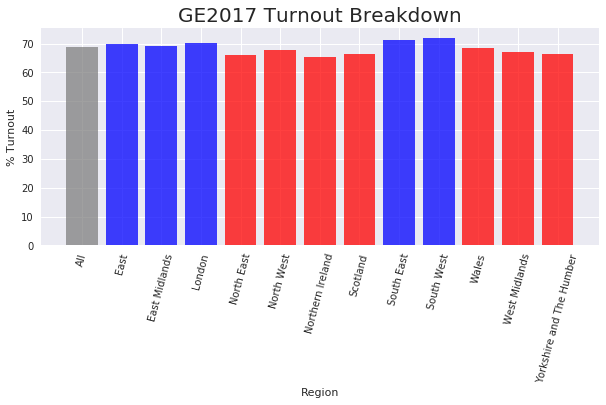

In [9]:
fig, ax = plt.subplots(figsize=(10 ,4))
ax.bar(region_totals_valid.index, height=region_totals_valid["turnout"], color= turnout_colours, alpha=0.75)
ax.set_xlabel("Region")
ax.set_ylabel("% Turnout")
ax.set_title("GE2017 Turnout Breakdown", size=20)

ax.tick_params(axis='x', rotation=75)

The below plots show the majority (in votes) for each seat, with each subplot showing the seats won by Labour, the Conservatives and the SNP. More seats won to the left would mean less wasted votes. A cursory glance seem to show Labour looking like they are generally winning the seats with lower turnouts (barring the ~20 seats with the largest majorities). 

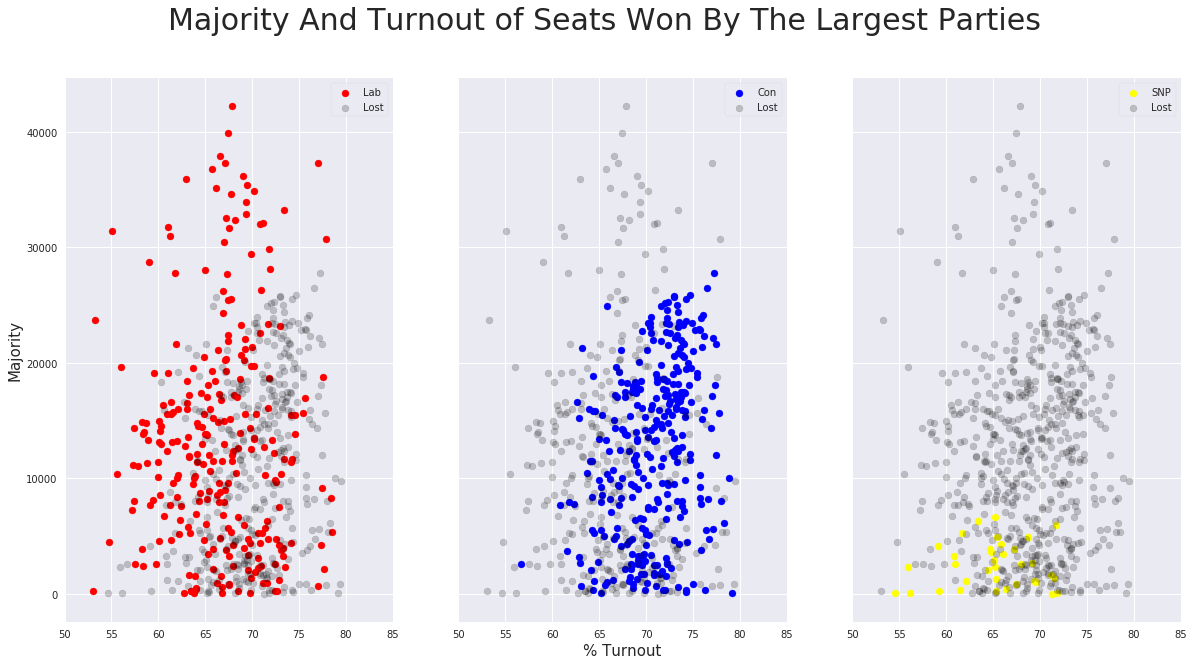

In [10]:
GE17["turnout"] = GE17["valid_votes"]/GE17["electorate"]*100


f, ax = plt.subplots(1,3 ,sharex=True, sharey=True, figsize=[20,10])

f.suptitle('Majority And Turnout of Seats Won By The Largest Parties', size=30)
ax[0].set_xlim(left=50, right=85)
#ax[0].set_ylim(top=5000)
ax[0].set_ylabel("Majority", size=15)
ax[1].set_xlabel("% Turnout", size=15)


ax[0].scatter(GE17[GE17["first_party"]=="Lab"]["turnout"], GE17[GE17["first_party"]=="Lab"]["majority"], c="red", 
           label = "Lab")
ax[0].scatter(GE17[GE17["first_party"]!="Lab"]["turnout"], GE17[GE17["first_party"]!="Lab"]["majority"], c="black", 
           label = "Lost", alpha=0.2)

ax[1].scatter(GE17[GE17["first_party"]=="Con"]["turnout"], GE17[GE17["first_party"]=="Con"]["majority"], c="blue",
          label = "Con")
ax[1].scatter(GE17[GE17["first_party"]!="Con"]["turnout"], GE17[GE17["first_party"]!="Con"]["majority"], c="black", 
           label = "Lost", alpha=0.2)

ax[2].scatter(GE17[GE17["first_party"]=="SNP"]["turnout"], GE17[GE17["first_party"]=="SNP"]["majority"], c="yellow",
          label = "SNP")
ax[2].scatter(GE17[GE17["first_party"]!="SNP"]["turnout"], GE17[GE17["first_party"]!="SNP"]["majority"], c="black", 
           label = "Lost", alpha=0.2)



ax[0].legend(frameon=True)
ax[1].legend(frameon=True)
ax[2].legend(frameon=True);


#have another subplot with majoritry vs low turnout? 
#put in line for average turnout

## Wasted Votes? 

The first-past the post (FPTP) system of the UK general election is a winner take all scenario, so there are many wasted votes and tactically voting is employed. Do any of the major parties have an edge in targeting voters in key seats?


When the X-axis is transformed to show the majority as a % of overall turnout (majority votes / overall turnout) the Labour party look to have won a lot of seats where large majorities are are larger % of overall turnout. Whereas the Conservatives are winning majorities with a lower % of the overall turnout. So Labour seem to waste more votes to win seats as they have larger majorities as a % of turnout.

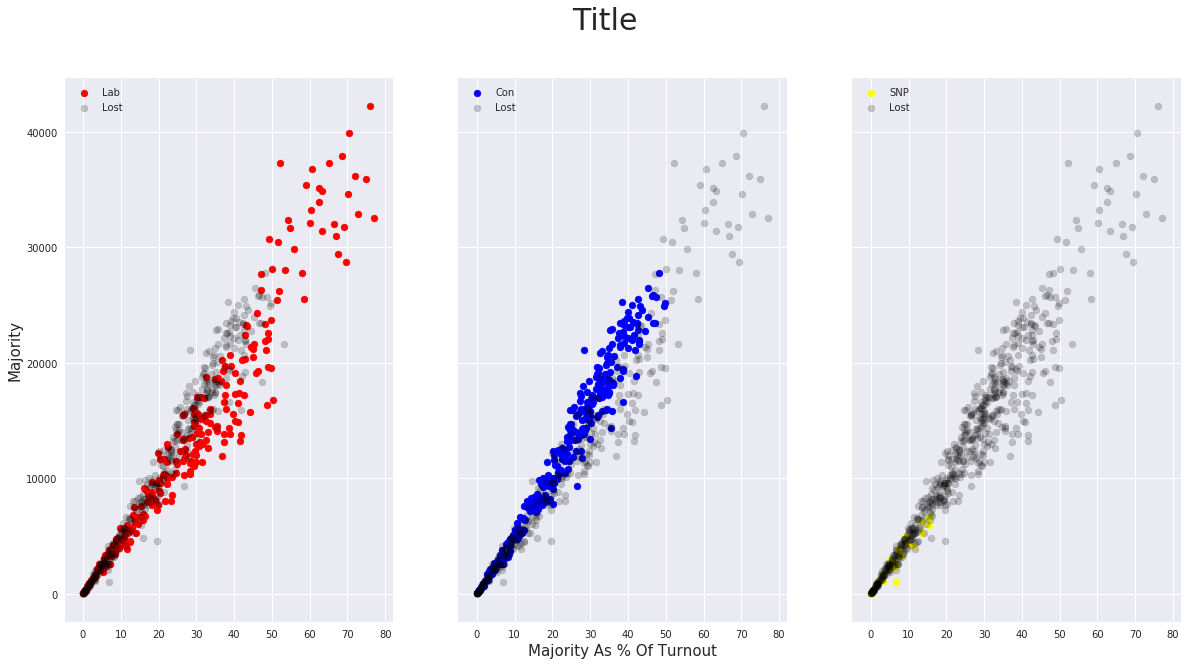

In [11]:
GE17["waste_votes"] = (GE17["majority"]/GE17["valid_votes"]*100)
f, ax = plt.subplots(1,3 ,sharex=True, sharey=True, figsize=[20,10])

f.suptitle('Title', size=30)
#ax[0].set_xlim(left=50, right=85)

ax[0].set_ylabel("Majority", size=15)
ax[1].set_xlabel("Majority As % Of Turnout", size=15)


ax[0].scatter(GE17[GE17["first_party"]=="Lab"]["waste_votes"], GE17[GE17["first_party"]=="Lab"]["majority"], c="red", 
           label = "Lab")
ax[0].scatter(GE17[GE17["first_party"]!="Lab"]["waste_votes"], GE17[GE17["first_party"]!="Lab"]["majority"], c="black", 
           label = "Lost", alpha=0.2)

ax[1].scatter(GE17[GE17["first_party"]=="Con"]["waste_votes"], GE17[GE17["first_party"]=="Con"]["majority"], c="blue",
          label = "Con")
ax[1].scatter(GE17[GE17["first_party"]!="Con"]["waste_votes"], GE17[GE17["first_party"]!="Con"]["majority"], c="black", 
           label = "Lost", alpha=0.2)

ax[2].scatter(GE17[GE17["first_party"]=="SNP"]["waste_votes"], GE17[GE17["first_party"]=="SNP"]["majority"], c="yellow",
          label = "SNP")
ax[2].scatter(GE17[GE17["first_party"]!="SNP"]["waste_votes"], GE17[GE17["first_party"]!="SNP"]["majority"], c="black", 
           label = "Lost", alpha=0.2)

#need to colour dots based on first_party

ax[0].legend()
ax[1].legend()
ax[2].legend();


#have another subplot with majoritry vs low waste_votes? 
#put in line for average waste_votes
#Pearson's line + con int for all and each party.

Plotting a slope of the seats won by each party shows the same trend as observed above, Labour waste more votes to win seats when compared to all seats. However, for the seats the Conservatives win with smaller majorities their trend is the opposite of the seats they win with larger majorities i.e. they win the toss-up, marginal seats with larger majorities. 

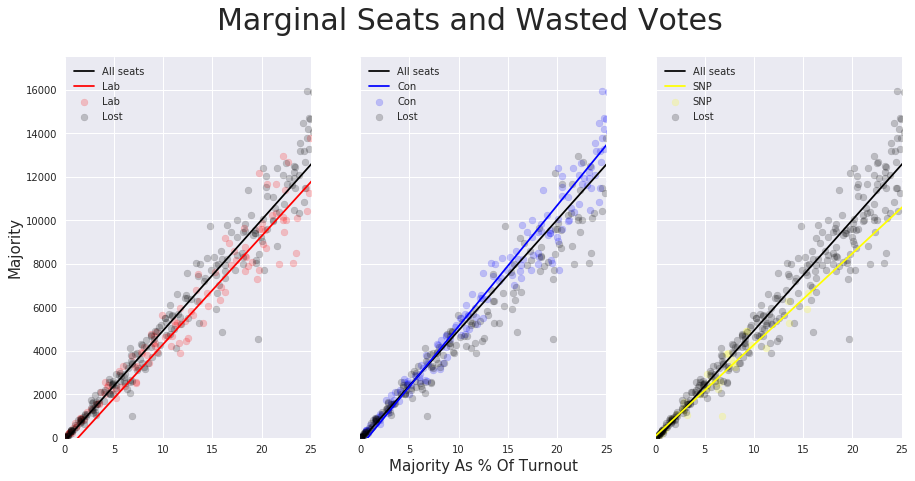

In [12]:
GE17["waste_votes"] = (GE17["majority"]/GE17["valid_votes"]*100)

slope, intercept, r_value, p_value, std_err = stats.linregress(GE17["waste_votes"] ,GE17["majority"])

f, ax = plt.subplots(1,3 ,sharex=True, sharey=True, figsize=[15,7])

f.suptitle('Marginal Seats and Wasted Votes', size=30)
ax[0].set_xlim(left=0, right=25)
ax[0].set_ylim(bottom=0, top=17500)



ax[0].set_ylabel("Majority", size=15)
ax[1].set_xlabel("Majority As % Of Turnout", size=15)


ax[0].scatter(GE17[GE17["first_party"]=="Lab"]["waste_votes"], GE17[GE17["first_party"]=="Lab"]["majority"], c="red", 
           label = "Lab", alpha=0.2)
ax[0].scatter(GE17[GE17["first_party"]!="Lab"]["waste_votes"], GE17[GE17["first_party"]!="Lab"]["majority"], c="black", 
           label = "Lost", alpha=0.2)
ax[0].plot([0, 100],  [intercept +slope*0, intercept +slope*100], color="black", label='All seats')


ax[1].scatter(GE17[GE17["first_party"]=="Con"]["waste_votes"], GE17[GE17["first_party"]=="Con"]["majority"], c="blue",
          label = "Con", alpha=0.2 )
ax[1].scatter(GE17[GE17["first_party"]!="Con"]["waste_votes"], GE17[GE17["first_party"]!="Con"]["majority"], c="black", 
           label = "Lost", alpha=0.2)
ax[1].plot([0, 100],  [intercept +slope*0, intercept +slope*100], color="black", label='All seats')


ax[2].scatter(GE17[GE17["first_party"]=="SNP"]["waste_votes"], GE17[GE17["first_party"]=="SNP"]["majority"], c="yellow",
          label = "SNP", alpha=0.2)
ax[2].scatter(GE17[GE17["first_party"]!="SNP"]["waste_votes"], GE17[GE17["first_party"]!="SNP"]["majority"], c="black", 
           label = "Lost", alpha=0.2)
ax[2].plot([0, 100],  [intercept +slope*0, intercept +slope*100], color="black", label='All seats')




def pearson_r(self):    
    return stats.linregress(GE17[GE17["first_party"]==self]["waste_votes"],
                                                                  GE17[GE17["first_party"]==self]["majority"])
    
to_plot = ["Lab", "Con", "SNP"]
colour = ["red","blue", "yellow"]

plots = 0
for i in to_plot:    
    slope, intercept, r_value, p_value, std_err = pearson_r(i)
    #print(slope)
    ax[plots].plot([0, 100],  [intercept +slope*0, intercept +slope*100], color=colour[plots], label= "{}".format(i))
           
    plots+= 1

ax[0].legend()
ax[1].legend()
ax[2].legend(); 

#f.savefig("plot.png")

#have another subplot with majoritry vs low waste_votes? 
#Pearson's line + con int for all and each party.

This analysis was extended to all regions of the UK - small sample sizes may make this difficult to interpret.

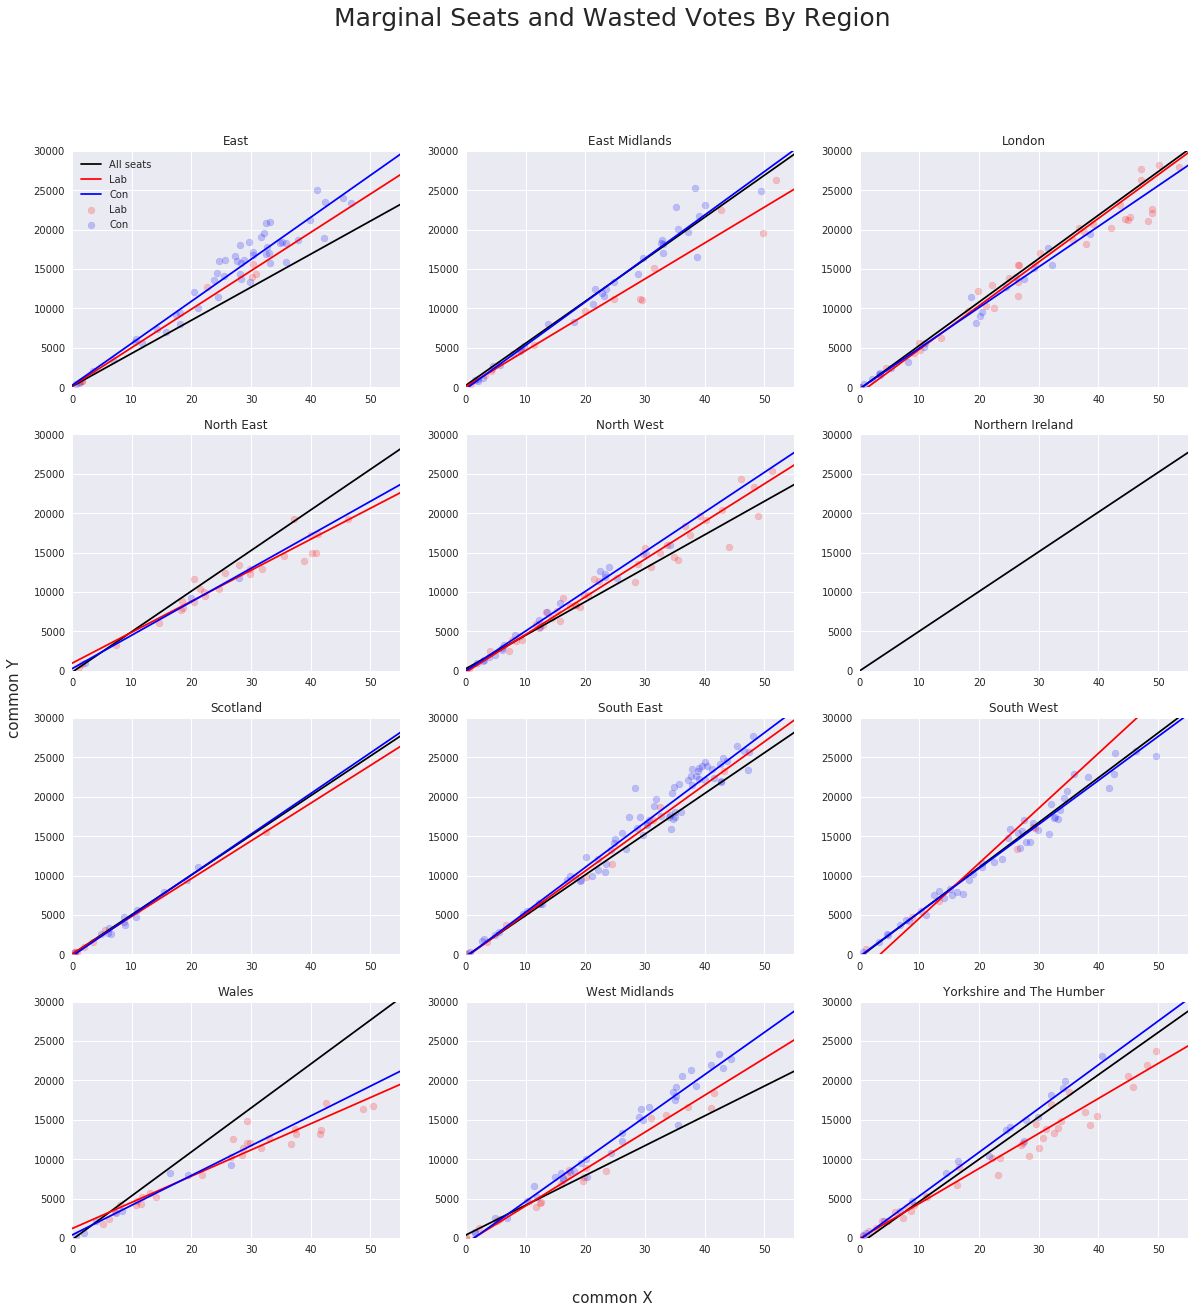

In [13]:
grid = plt.GridSpec(4, 3, wspace=0.2, hspace=0.2)
fig = plt.figure(figsize=(20, 20))

fig.suptitle("Marginal Seats and Wasted Votes By Region", size =25)
fig.text(0.5, 0.08, 'common X', ha='center', size =15)
fig.text(0.08, 0.5, 'common Y', va='center', rotation='vertical', size =15)

x = len(region_totals.index)

to_plot = ["Lab", "Con"]
colour = ["red","blue"]

pearson_all = graph.plot([0, 100],  [intercept +slope*0, intercept +slope*100], color="black", label='All seats', alpha =0.5)

def pearson_r_region(p, r):    
    return stats.linregress(p, r)

for region in range (0, x-1):
    
    
    #print((i)//4, (i%4)+4)
    #print((i-1)//4)#, 4+i%4)
    graph = fig.add_subplot(grid[region//3, (region%3)])
        
    graph.set_title(str(region_totals.index[region]))
    graph.set_xlim(right = 55)
    graph.set_ylim(top = 30000)
    graph.plot([0, 100],  [intercept +slope*0, intercept +slope*100], color="black", label='All seats')
    

    plots = 0
    for i in to_plot:
        
        pearson_all  #adds the linregress for all seats to the plot    
        
        #print(to_plot[plots], region)
        x = GE17[(GE17["first_party"]== to_plot[plots]) & 
                 (GE17["region_name"]== str(region_totals.index[region]))]["waste_votes"] #np.arange(100)#
        #print("X:",x)
        y = GE17[(GE17["first_party"]== to_plot[plots]) & 
                 (GE17["region_name"]== str(region_totals.index[region]))]["majority"] #np.arange(10000)#
        #print("Y:",y)
        
        graph.scatter(x, y, color = colour[plots],label = to_plot[plots], alpha=0.2)
        
        
        if str(region_totals.index[region]) == "Northern Ireland":
            pass
        else:        
            slope, intercept, r_value, p_value, std_err = pearson_r_region(x, y)
            #print(slope)
            graph.plot([0, 100],  [intercept +slope*0, intercept +slope*100], color=colour[plots], label= "{}".format(i))
        
        if str(region_totals.index[region]) == "East":
            graph.legend()
        else:        
            pass
        
        plots+= 1
        
        
# add r value to plots
    



#  Proportional Vote Share

Proportional Representation is constantly talked about in the UK - especially as the last election produced a majority government with a low % of votes won. Below shows an approximation of the seats if all 650 were allocated proportionally to the % of votes won. The disparity of the Conservative and Lib Dem share shows a real disconnect between votes won and seats won. 

In [14]:
total_votes = region_totals.loc["All"].sum()

region_totals.columns

votes = pd.Series(region_totals.loc["All"], index=region_totals.columns)
PR = pd.DataFrame(votes)
PR["Vote_%"] = PR["All"]/total_votes*100
PR["PR_seats"] = PR["Vote_%"]/100*650
PR["PR_seats"] = PR["PR_seats"].astype(int)
#PR["PR_seats"].sum() # =641
#seats and seat %
#difference in two
PR["Actual Seats"] = [0, 317, 10, 1, 262, 12, 2, 4, 0, 7, 35, 0, 0]
PR.columns



Index(['All', 'Vote_%', 'PR_seats', 'Actual Seats'], dtype='object')

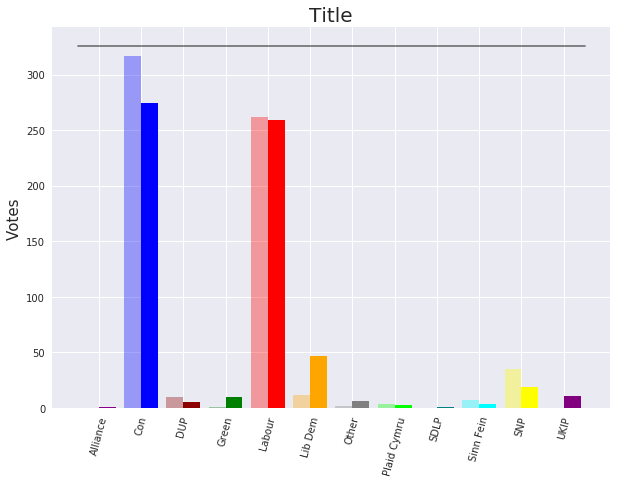

In [15]:
fig, ax = plt.subplots(figsize=(10,7))

x = len(PR.index)
for i in range (0, x-1):
    
    ax.bar(i+0.2, height=PR.iloc[i,2], color=colours[i], width=0.4)    
    ax.bar(i-0.2, height=PR.iloc[i,3], color=colours[i], width=0.4, alpha = 0.35)

#all.bar(labels, height=region_totals.loc["All"], color=colours, label=labels)
plt.xticks(np.arange(12), labels)
ax.tick_params(axis='x', rotation=75)
ax.set_ylabel("Votes", size =15)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("Title", size = 20)

ax.plot([-0.5, 11.5], [326,326], color="black", alpha=0.5);


# Biggest Marginals

In [16]:
marginal = GE17[["constituency_name","alliance", "con", "dup", "green", "lab", "ld", "other_party", "pc","sdlp", "sf", 
                 "snp", "ukip", "uup", "valid_votes"]]
marginal.head()

,constituency_name,alliance,con,dup,green,lab,ld,other_party,pc,sdlp,sf,snp,ukip,uup,valid_votes
0,Aberavon,0,5901,0,0,22662,599,0,2761,0,0,0,1345,0,33268
1,Aberconwy,0,14337,0,0,13702,941,0,3170,0,0,0,0,0,32150
2,Aberdeen North,0,8341,0,0,11031,1693,522,0,0,0,15170,0,0,36757
3,Aberdeen South,0,18746,0,0,9143,2610,0,0,0,0,13994,0,0,44493
4,Airdrie and Shotts,0,8813,0,0,14096,802,0,0,0,0,14291,0,0,38002


In [17]:
marginal_proportion = marginal.iloc[:,1:-1].div(marginal.iloc[:,-1], axis=0)
marginal_proportion["constituency_name"] = GE17["constituency_name"]

marginal_proportion.head()

,alliance,con,dup,green,lab,ld,other_party,pc,sdlp,sf,snp,ukip,uup,constituency_name
0,0.0,0.177378,0.0,0.0,0.681195,0.018005,0.000000,0.082993,0.0,0.0,0.000000,0.040429,0.0,Aberavon
1,0.0,0.445941,0.0,0.0,0.426190,0.029269,0.000000,0.098600,0.0,0.0,0.000000,0.000000,0.0,Aberconwy
2,0.0,0.226923,0.0,0.0,0.300106,0.046059,0.014201,0.000000,0.0,0.0,0.412711,0.000000,0.0,Aberdeen North
3,0.0,0.421325,0.0,0.0,0.205493,0.058661,0.000000,0.000000,0.0,0.0,0.314521,0.000000,0.0,Aberdeen South
4,0.0,0.231909,0.0,0.0,0.370928,0.021104,0.000000,0.000000,0.0,0.0,0.376059,0.000000,0.0,Airdrie and Shotts


In [18]:
majority = GE17[["constituency_name", "majority"]]
majority.head()

,constituency_name,majority
0,Aberavon,16761
1,Aberconwy,635
2,Aberdeen North,4139
3,Aberdeen South,4752
4,Airdrie and Shotts,195


In [19]:
marginal_proportion_merge = marginal_proportion.merge(majority, left_on=["constituency_name"], 
                                                      right_on=["constituency_name"], 
                                                how="inner")
#marginal_proportion_merge.head()

marginal_proportion_merge = marginal_proportion_merge.sort_values(by=["majority"], ascending=True, axis=0)
#marginal_proportion_merge.head()
marginal_proportion_merge = marginal_proportion_merge.reset_index()
#marginal_proportion = marginal_proportion.drop(["majority_x", "majority_y"], axis=1)
marginal_proportion_merge = marginal_proportion_merge.drop(["index"], axis=1)
marginal_proportion_merge.head()

#plot bar in -ve space of who won, set lim for axis. 

,alliance,con,dup,green,lab,ld,other_party,pc,sdlp,sf,snp,ukip,uup,constituency_name,majority
0,0.0,0.241213,0.0,0.000000,0.096265,0.328559,0.005356,0.0,0.0,0.0,0.328607,0.000000,0.0,North East Fife,2
1,0.0,0.421775,0.0,0.019831,0.422292,0.122140,0.013962,0.0,0.0,0.0,0.000000,0.000000,0.0,Kensington,20
2,0.0,0.422766,0.0,0.000000,0.103814,0.050247,0.000000,0.0,0.0,0.0,0.423173,0.000000,0.0,Perth and North Perthshire,21
3,0.0,0.464354,0.0,0.006168,0.464919,0.009458,0.000000,0.0,0.0,0.0,0.000000,0.055102,0.0,Dudley North,22
4,0.0,0.481137,0.0,0.000000,0.481821,0.037042,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,Newcastle-Under-Lyme,30


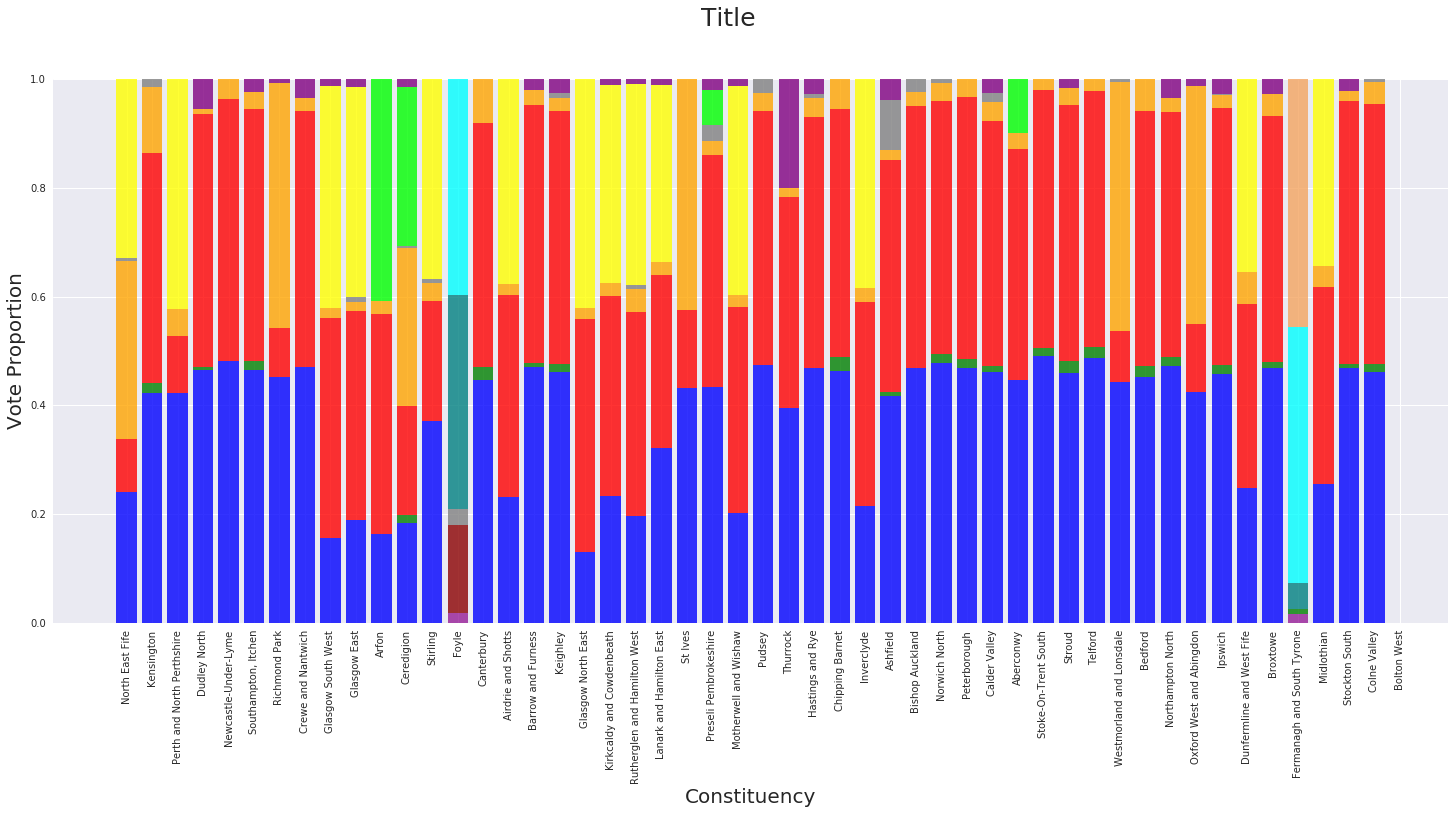

In [20]:




f, ax = plt.subplots(figsize=(25,10))
ax.bar(marginal_proportion_merge.index[0:50], marginal_proportion_merge.iloc[0:50, 0], color = colours[0], alpha = 0.7 )
f.suptitle("Title", size=25)
ax.set_xlabel("Constituency", size=20)
ax.set_ylabel("Vote Proportion", size=20)
ax.set_ylim(bottom=0, top=1)
plt.xticks(np.arange(51), marginal_proportion_merge.loc[0:50, "constituency_name"])
ax.tick_params(axis='x', rotation=90)

marginal_t = marginal_proportion_merge.transpose()


for make_graph in range(1, len(marginal.columns)-2):
    bottom_value = marginal_t.iloc[ :make_graph, 0:50].sum(axis=0)
    #print(bottom_value)
    ax.bar(marginal_proportion_merge.index[0:50], height = marginal_proportion_merge.iloc[0:50, make_graph], 
           bottom=bottom_value, color = colours[make_graph], alpha = 0.8  )
    



#plot the winner in -ve space as a 0.05 block of colour. as a subplot, also plot majority as inverse below. legend to the right

# Something else


#graph, cum sum of seats by time.


